#  Linear regression with one variable 'Basic concepts'

# Implementation of Linear regression with one variable


#### La régression linéaire avec une seule variable est une méthode d'analyse statistique qui permet de modéliser la relation entre une variable dépendante (ou réponse) et une variable indépendante (ou explicative) en utilisant une fonction linéaire.

### Mettre en œuvre la régression linéaire avec une variable.

### - Importer les bibliothèques:

#### Numpy est une bibliothèque Python qui fournit des outils pour travailler avec des tableaux multidimensionnels, tandis que Matplotlib.pyplot est une bibliothèque pour créer des graphiques et des visualisations en Python. Ces bibliothèques sont couramment utilisées pour implémenter des algorithmes de Machine Learning. 

In [3]:
import numpy as np 
import matplotlib.pyplot as plt 

## 1. Data load and visualization
 

### Nous allons utiliser un ensemble de données fictif généré par la fonction make_regression.
    La fonction make_regression génère des données aléatoires pour une régression linéaire. Elle crée une matrice de caractéristiques X et une variable cible y. Les données générées peuvent être utilisées pour la modélisation et l'analyse.
    Dans cet exercice, nous allons charger les données à l'aide de la fonction make_regression, puis les visualiser à l'aide d'outils de visualisation de données. Cela nous permettra de mieux comprendre les caractéristiques des données et de leur relation avec la variable cible.


In [4]:
from sklearn.datasets import make_regression 

### Cette instruction va générer un ensemble de données fictives pour une régression linéaire avec 100 échantillons et une seule fonctionnalité (caractéristique) appelée "x". La variable cible, "y", sera également générée. Le paramètre "noise" détermine le niveau de bruit dans les données générées.

Une fois que l'ensemble de données a été généré, nous pouvons utiliser différentes techniques de visualisation pour explorer les données et comprendre leur structure et leurs relations. 

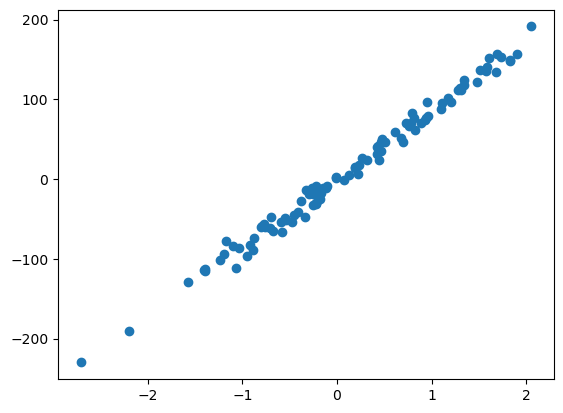

In [5]:

x, y = make_regression(n_samples=100, n_features=1, noise=10)
#visualiser les données
plt.scatter(x, y)

### Utilisons la fonction shape pour voir la dimension de x et y. 

In [6]:
print(x.shape)
print(y.shape)

(100, 1)
(100,)


### Nous remarquons que la dimension de y n'est pas complète. Utilisons donc la fonction reshape pour avoir la bonne dimension.

In [7]:
print(x.shape)
# redimensionner y
y=y.reshape(100,1)
print(y.shape)

(100, 1)
(100, 1)


## 2. Dataset preparation and Model parameters’ initialization

#### La préparation du jeu de données fait référence au processus de collecte, de nettoyage et de mise en forme des données pour les utiliser dans les modèles d'apprentissage automatique. L'initialisation des paramètres du modèle fait référence au processus d'attribution de valeurs initiales aux poids et aux biais d'un modèle d'apprentissage automatique. Cela se fait généralement de manière aléatoire ou avec un modèle pré-entraîné. Les valeurs initiales des paramètres ont un impact significatif sur les performances du modèle

#- Puisque nous stockons chaque exemple sous forme de ligne dans la matrice X, afin de tenir compte du terme d'interception (θ0), nous ajoutons une première colonne supplémentaire à X et la définissons à toutes les valeurs de 1. Cela nous permet de traiter θ0 simplement comme une autre "fonctionnalité".

Pour ajouter une colonne de 1 à x, nous pouvons utiliser la fonction hstack pour combiner x avec un vecteur de 1 (np.ones(<taille du vecteur>)).

In [8]:
#Add a column of ones to x by using the hstack function to combine x with a vector of 1
X = np.hstack((x, np.ones(x.shape)))
X

array([[-1.03479631,  1.        ],
       [-1.23888834,  1.        ],
       [-0.33824777,  1.        ],
       [ 1.11106877,  1.        ],
       [ 0.42314843,  1.        ],
       [ 2.05234228,  1.        ],
       [-0.224091  ,  1.        ],
       [-1.09676015,  1.        ],
       [ 0.61130821,  1.        ],
       [-0.78793841,  1.        ],
       [-0.70749598,  1.        ],
       [-0.9150432 ,  1.        ],
       [-1.39120357,  1.        ],
       [-0.54683535,  1.        ],
       [-2.70714378,  1.        ],
       [-0.17098997,  1.        ],
       [ 0.67689617,  1.        ],
       [-0.21802209,  1.        ],
       [-0.59030028,  1.        ],
       [ 1.82599088,  1.        ],
       [ 0.42664985,  1.        ],
       [-0.80619248,  1.        ],
       [-0.32710276,  1.        ],
       [-0.1096747 ,  1.        ],
       [ 1.4751316 ,  1.        ],
       [-0.010891  ,  1.        ],
       [-0.88077842,  1.        ],
       [ 0.82631934,  1.        ],
       [ 1.69284682,

### Voir la dimension

In [10]:
print(X.shape)

(100, 2)


### Nous initialisons également les paramètres initiaux theta à l'aide de la fonction random.randn()

In [9]:
theta = np.random.randn(2, 1)
theta

array([[0.26079349],
       [0.17113172]])

# Definition and visualization of the model with intial parameters

# Modèle

### La fonction hypothèse est utilisée pour estimer les valeurs de sortie à partir des entrées. Elle prend une matrice d'entrée X et une matrice de paramètres θ en entrée, et retourne le produit de matrices X*θ.

In [10]:
def model(X, theta):
    return X.dot(theta)

### Ensuite, Nous visualisons les résultats du modèle par la courbe du modèle suivante et les points de données dans le même graphique .

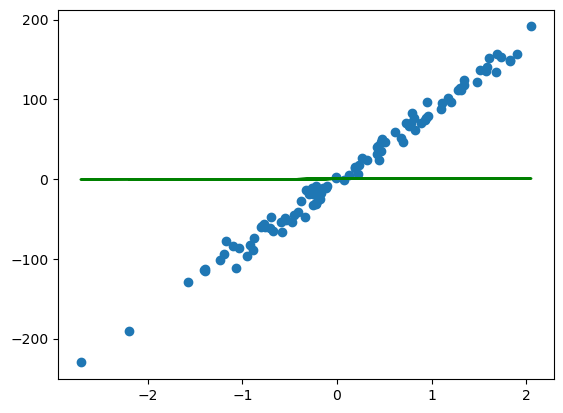

In [11]:
plt.scatter(x,y)
plt.plot(x,model(X,theta),color="green")

### En observant la visualisation, nous remarquons que la courbe du modèle ne correspond pas exactement aux points de données. Cela signifie que les paramètres initiaux ne sont pas les meilleurs pour ajuster le modèle aux données. Il faut peut-être effectuer une optimisation pour trouver les meilleurs paramètres.

## 4. Cost function implementation

### L'implémentation de la fonction de coût consiste à écrire le code qui calcule la valeur de la fonction J(θ) pour un ensemble de données d'entraînement donné, où J(θ) est une fonction de la variable θ qui représente les paramètres d'un modèle. La fonction de coût mesure l'écart entre les prédictions du modèle et les valeurs réelles de l'ensemble d'entraînement, et permet d'évaluer la qualité de la prédiction du modèle.

# 
Le code commence par calculer la taille de l'ensemble d'entraînement, représentée par la variable m qui est la longueur du vecteur y.
Ensuite, la fonction appelle un modèle qui prend en entrée les matrices X et θ et calcule les prédictions du modèle pour chaque exemple de l'ensemble d'entraînement. Le résultat est soustrait de y, ce qui donne un vecteur d'erreur pour chaque exemple.

In [13]:
def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)

#### La fonction utilise ces paramètres pour calculer les prédictions du modèle et comparer ces prédictions aux valeurs réelles des données d'entraînement. Elle retourne une valeur qui représente la différence entre les prédictions et les valeurs réelles

In [14]:
cost_function(X, y, theta)

3652.8057596705994

In [15]:
(model(X,theta)-y).shape

(100, 1)

## 5. Gradient descent implementation


#- La fonction grad(X, y, theta) retourne le gradient de la fonction de coût par rapport aux paramètres theta. Plus précisément, cette fonction calcule la dérivée partielle de la fonction de coût par rapport à chaque paramètre theta_j. Le résultat est un vecteur de même dimension que theta.

In [16]:
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X,theta)-y)




In [17]:
grad(X, y, theta)

array([[-84.50746501],
       [-12.11986268]])

#- La fonction gradient_descent effectue une descente de gradient pour trouver les paramètres optimaux d'un modèle de régression linéaire. Les paramètres sont ajustés à chaque itération pour minimiser la différence entre les prédictions du modèle et les valeurs réelles. 

In [18]:
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta) 
    return theta

#- Ce code utilise la fonction gradient_descent pour ajuster les paramètres du modèle de régression linéaire,le taux d'apprentissage (learning rate) qui est fixé à 0.01 et le nombre d'itérations pour la descente de gradient qui est fixé à 1000

In [19]:
theta_f=gradient_descent(X, y, theta, learning_rate=0.01, n_iterations=1000)

In [20]:
theta_f

array([[8.58816736e+01],
       [1.22373925e-02]])

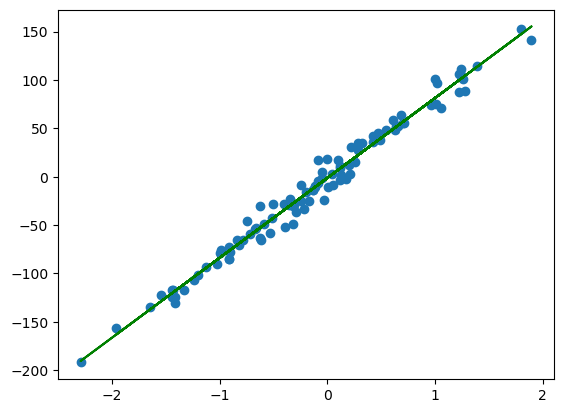

In [42]:
plt.scatter(x,y)
plt.plot(x,model(X,theta_f),color="green")

### Après le tracage de la courbe , on constitue que la nouvelle hypothèse a mieux représenter les données car la différence entre les prévisions du modèle et les valeurs réelles sont réduite et la courbe a passé à proximité de tous les points du jeu de données.



## Homework (optional)


### Pour tracer un graphique montrant l'évolution de la fonction de coût en fonction du nombre d'itérations lors de l'entraînement d'un modèle de machine learning, il est nécessaire de stocker la valeur de la fonction de coût à chaque itération.

#- Cette fonction gradient_descent est une implémentation de l'algorithme de descente de gradient. Elle prend en entrée une matrice de données X, un vecteur cible y, un vecteur de paramètres theta initial, un taux d'apprentissage (learning_rate) et un nombre d'itérations (n_iterations) à effectuer. La fonction effectue alors une boucle sur le nombre d'itérations spécifié. À chaque itération, elle calcule la mise à jour des paramètres theta en utilisant la formule de la descente de gradient :
                                    theta = theta - learning_rate * grad(X, y, theta)
                                    
Ensuite, la fonction enregistre la valeur de la fonction de coût pour les données actuelles dans une liste cost_history qui sera renvoyée en même temps que les paramètres theta mis à jour.

Et Finalement, la fonction renvoie les paramètres theta mis à jour ainsi que l'historique des coûts, qui peut être utilisé pour tracer l'évolution de la fonction de coût au fil des itérations.

In [21]:
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    
    cost_history = np.zeros(n_iterations) # création d'un tableau de stockage pour enregistrer l'évolution du Cout du modele
    
    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta) # mise a jour du parametre theta (formule du gradient descent)
        cost_history[i] = cost_function(X, y, theta) # on enregistre la valeur du Cout au tour i dans cost_history[i]
        
    return theta, cost_history

In [22]:
n_iterations = 1000
learning_rate = 0.01


theta_final, cost_history = gradient_descent(X, y, theta, learning_rate, n_iterations)

In [23]:
theta_final

array([[8.58816736e+01],
       [1.22373925e-02]])

In [24]:
# création d'un vecteur prédictions qui contient les prédictions de notre modele final
predictions = model(X, theta_final)



## 6-Learning curves

### La vérification de l'efficacité de l'algorithme de descente de gradient consiste à observer l'évolution de la fonction de coût au fil des itérations. L'objectif est d'obtenir une courbe décroissante qui converge vers un niveau minimal (proche de zéro). Si la courbe ne suit pas cette tendance, cela indique que le taux d'apprentissage (learning rate) peut être trop élevé et qu'une valeur plus faible doit être utilisée.

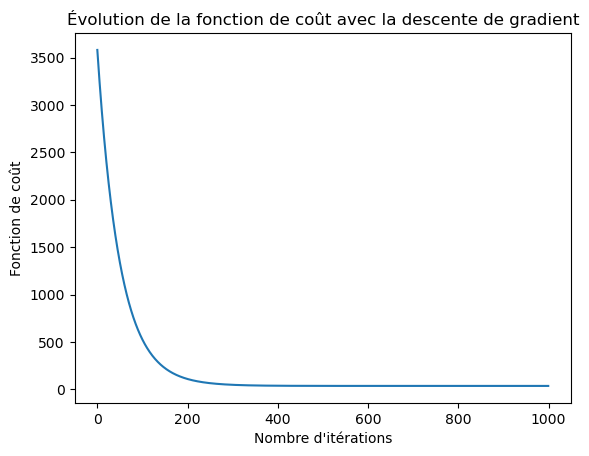

In [25]:
plt.plot(range(n_iterations), cost_history)
plt.xlabel('Nombre d\'itérations')
plt.ylabel('Fonction de coût')
plt.title('Évolution de la fonction de coût avec la descente de gradient')
plt.show()

## 7-Final evaluation. 

### Pour mesurer la performance effective de notre modèle,on peut utiliser le coefficient de détermination

#- La fonction "coef_determination" permet de calculer le coefficient de détermination R², qui mesure la proportion de la variance totale de la variable dépendante y qui est expliquée par le modèle de régression.

Le code commence par calculer la somme des carrés des résidus (u), qui mesure la variation non expliquée par le modèle, en soustrayant les prédictions (pred) des valeurs réelles de y, puis en élevant le résultat au carré et en faisant la somme des carrés.

Ensuite, la somme des carrés totale (v) est calculée en soustrayant la moyenne de y de chaque valeur de y, en élevant le résultat au carré et en faisant la somme des carrés. Cette quantité mesure la variation totale de y.

Finalement, le coefficient de détermination est calculé en soustrayant u de v, en divisant le résultat par v, et en soustrayant le quotient de 1. Le résultat est donc une mesure de la proportion de la variance totale de y qui est expliquée par le modèle de régression, avec une valeur de 1 indiquant une ajustement parfait du modèle et une valeur proche de 0 indiquant que le modèle ne parvient pas à expliquer la variation de y. 

In [26]:
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [27]:
coef_determination(y, predictions)

0.9901068963760913

### Le résultat du coefficient de détermination est de 0.9821943324576525, ce qui indique que le modèle de régression linéaire s'ajuste très bien aux données observées. Plus précisément, cela signifie que 98,2% de la variance totale des données est expliquée par la régression linéaire, ce qui est considéré comme un ajustement très fort.